In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # use SVM as base
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn . ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('WMT1.csv')
data_17 = data[data.Year == 2017]

# calculate the mean std
mean_17 = data_17.groupby('Week_Number')['Return'].mean().tolist()
std_17 = data_17.groupby('Week_Number')['Return'].std().tolist()
week_id_17 = list(data_17.groupby('Week_Number').indices.keys())
color_17 = data_17.groupby('Week_Number')['label'].agg(lambda x: x.mode()).tolist()

data_18 = data[data.Year == 2018]
data_18.drop(data_18.index[-1], inplace=True)

# calculate the mean std
mean_18 = data_18.groupby('Week_Number')['Return'].mean().tolist()
std_18 = data_18.groupby('Week_Number')['Return'].std().tolist()
weekly_18 = data[(data.Year == 2018) & (data.Weekday == 'Friday')]['Adj Close'].values  # select Friday's data

week_id_18 = list(data_18.groupby('Week_Number').indices.keys())
color_18 = data_18.groupby('Week_Number')['label'].agg(lambda x: x.mode()).tolist()


/Users/wangxiaoyang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [3]:
df_17 = pd.DataFrame(
    {
        'id':week_id_17,
        'mean':mean_17,
        'std':std_17,
        'label':color_17
    },
    columns = ['id','mean','std','label']
)

df_18 = pd.DataFrame(
    {
        'id':week_id_18,
        'mean':mean_18,
        'std':std_18,
        'label':color_18
    },
    columns = ['id','mean','std','label']
)

In [4]:
x_train = df_17[['mean','std']].values
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
y_train= df_17['label'].values

x_test = df_18[['mean','std']].values
scaler = StandardScaler()
scaler.fit(x_test)
x_test = scaler.transform(x_test)
y_test = df_18['label'].values

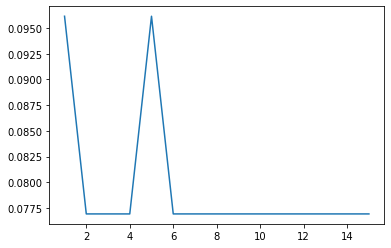

In [33]:
#question1,2
#lambda = 0.5
#svm
x_label = []
err_rate_list = []
for n in range(15):
    svc = SVC ( probability =True , kernel ='linear')
    model = AdaBoostClassifier ( n_estimators =n+1, base_estimator =svc ,learning_rate = 0.5)
    model.fit(x_train , y_train)
    prediction = model.predict (x_test)
    error_rate = np. mean ( prediction!=y_test)
    err_rate_list.append(error_rate)
    x_label.append(n+1)
plt.plot(x_label, err_rate_list)
plt.show()

In [34]:
print('for svm estimator, the best value N for learn-ing rate = 0.5 is 10')

for svm estimator, the best value N for learn-ing rate = 0.5 is 10


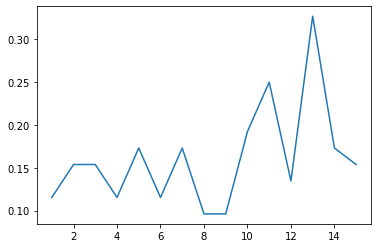

In [37]:
#naivebayse
x_label = []
err_rate_list = []
for n in range(15):
    NB_classifier = GaussianNB()
    model = AdaBoostClassifier ( n_estimators =n+1, base_estimator =NB_classifier ,learning_rate = 0.5)
    model.fit(x_train , y_train)
    prediction = model.predict (x_test)
    error_rate = np. mean (prediction!=y_test)
    err_rate_list.append(error_rate)
    x_label.append(n+1)
plt.plot(x_label, err_rate_list)
plt.show()

In [39]:
print('for naive b estimator, the best value N for learn-ing rate = 0.5 is 8')

for naive b estimator, the best value N for learn-ing rate = 0.5 is 8


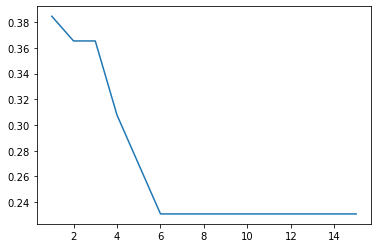

In [42]:
#lr
x_label = []
err_rate_list = []
for n in range(15):
    log_reg_classifier = LogisticRegression ()
    model = AdaBoostClassifier ( n_estimators =n+1, base_estimator =log_reg_classifier ,learning_rate = 0.5)
    model.fit(x_train , y_train)
    prediction = model.predict (x_test)
    error_rate = np. mean (prediction!=y_test)
    err_rate_list.append(error_rate)
    x_label.append(n+1)
plt.plot(x_label, err_rate_list)
plt.show()


In [44]:
print('for lr estimator, the best value N for learn-ing rate = 0.5 is 8')

for lr estimator, the best value N for learn-ing rate = 0.5 is 8


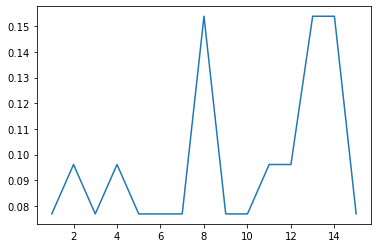

In [16]:
#lambda = 1
#svm
x_label = []
err_rate_list = []
for n in range(15):
    svc = SVC ( probability =True , kernel ='linear')
    model = AdaBoostClassifier ( n_estimators =n+1, base_estimator =svc ,learning_rate = 1)
    model.fit(x_train , y_train)
    prediction = model.predict (x_test)
    error_rate = np. mean ( prediction!=y_test)
    err_rate_list.append(error_rate)
    x_label.append(n+1)
plt.plot(x_label, err_rate_list)
plt.show()

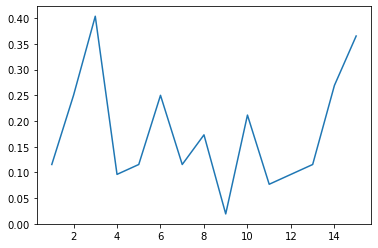

In [17]:
#naivebayse
x_label = []
err_rate_list = []
for n in range(15):
    NB_classifier = GaussianNB()
    model = AdaBoostClassifier ( n_estimators =n+1, base_estimator =NB_classifier ,learning_rate = 1)
    model.fit(x_train , y_train)
    prediction = model.predict (x_test)
    error_rate = np. mean (prediction!=y_test)
    err_rate_list.append(error_rate)
    x_label.append(n+1)
plt.plot(x_label, err_rate_list)
plt.show()

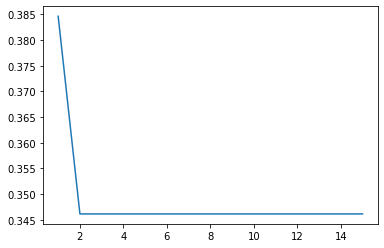

In [18]:
#lr
x_label = []
err_rate_list = []
for n in range(15):
    log_reg_classifier = LogisticRegression ()
    model = AdaBoostClassifier ( n_estimators =n+1, base_estimator =log_reg_classifier ,learning_rate = 1)
    model.fit(x_train , y_train)
    prediction = model.predict (x_test)
    error_rate = np. mean (prediction!=y_test)
    err_rate_list.append(error_rate)
    x_label.append(n+1)
plt.plot(x_label, err_rate_list)
plt.show()

In [49]:
#question3

#lambda = 0.5
#svm
svc = SVC ( probability =True , kernel ='linear')
model = AdaBoostClassifier ( n_estimators =10, base_estimator =svc ,learning_rate = 0.5)
model.fit(x_train , y_train)
prediction = model.predict (x_test)
accuracy = 1- np. mean ( prediction!=y_test)
print('accuracy for svm estimator choice is %f'%accuracy)

accuracy for svm estimator choice is 0.923077


In [53]:
#naivebayse
NB_classifier = GaussianNB()
model = AdaBoostClassifier ( n_estimators =8, base_estimator =NB_classifier ,learning_rate = 0.5)
model.fit(x_train , y_train)
prediction1 = model.predict (x_test)
accuracy1 = 1- np. mean ( prediction1!=y_test)
print('accuracy for nb estimator choice is %f'%accuracy1)

accuracy for nb estimator choice is 0.903846


In [54]:
#lr
log_reg_classifier = LogisticRegression ()
model = AdaBoostClassifier ( n_estimators =8, base_estimator =log_reg_classifier ,learning_rate = 0.5)
model.fit(x_train , y_train)
prediction2 = model.predict (x_test)
accuracy2 = 1- np. mean ( prediction2!=y_test)
print('accuracy for lr estimator choice is %f'%accuracy2)

accuracy for lr estimator choice is 0.769231


In [55]:
#question4

print('svm is best to use as base estimator for my data')

svm is best to use as base estimator for my data


In [56]:
#question5
previous_shares = 0
previous_balance = 100
weekly_balance = []
for i in range(len(weekly_18)-1):
    if prediction[i+1] == 'green':
        if previous_shares ==0 :
            previous_shares = previous_balance/weekly_18[i]
    elif prediction[i+1] == 'red':
        if previous_shares != 0:
            previous_balance = previous_shares*weekly_18[i]
            previous_shares = 0

    weekly_balance.append(previous_balance)
result = weekly_balance[-1]


In [57]:
result2 = 100/weekly_18[0]*weekly_18[-1]

print('result based on my labels: %f $'%result)
print('result based on buy and hold: %f $'%result2)
print('my labels results in a large amount at the end of the year')

result based on my labels: 124.397458 $
result based on buy and hold: 94.188504 $
my labels results in a large amount at the end of the year
